## י 📌 עצי סיווג $(Classification Trees)$ י  

## **📌 י מבוא י**  
י עצי סיווג $(Classification Trees)$ הם שיטה ללמידת מכונה שבה אנו מחלקים את מרחב המשתנים **באופן היררכי** כדי לסווג תצפיות לקטגוריות שונות. י  
י בדומה לעצי רגרסיה, עץ סיווג מחלק את הנתונים **באופן חוזר** עד שמגיעים לעלים סופיים המייצגים מחלקות שונות. י  

**י יתרון מרכזי:** י  
י עצי סיווג **פשוטים לאינטרפרטציה** ומאפשרים להבין **כיצד מתקבלות התחזיות** בדרך אינטואיטיבית של פיצולים על פי שאלות "כן/לא" (או "קטן/גדול מ..."). י  

---

## **📌 י כיצד עובד עץ סיווג? י**  
י עצי סיווג מבוססים על **חלוקה רקורסיבית של הנתונים** במטרה ליצור קבוצות הומוגניות ככל הניתן מבחינת המחלקות $(Labels)$. י  

1. **י בחירת משתנה חיתוך $j$ ונקודת חיתוך $s$** שממזערים חוסר אחידות בנתונים: י  
   $$
   R_1(j, s) = \{X \mid X_j \leq s\}, 
   \quad 
   R_2(j, s) = \{X \mid X_j > s\}
   $$
2. **י מדידת טוהר המחלקות** $(Impurity)$ לאחר הפיצול באמצעות מדדי **$Gini$, $Cross-Entropy$, או $Error Rate$** (המוסברים בהרחבה בהמשך). י  
3. **י חזרה על התהליך** באזורים החדשים שהתקבלו מהפיצול, עד שמגיעים לקריטריון עצירה מסוים (למשל: עומק עץ מקסימלי, מספר מינימלי של דגימות בעלה או שיפור מזערי בטוהר). י  

---

## **📌 י הבדלים בין עצי רגרסיה לעצי סיווג י**  
| **י מאפיין י** | **י עצי רגרסיה י** | **י עצי סיווג י** |
|----------------------|---------------------------------------|-----------------------------------------|
| **י משתנה מטרה י** | משתנה רציף (מספרי) | משתנה קטגורי (סיווג) |
| **י קריטריון פיצול י** | מינימיזציה של $RSS$ (שגיאה ריבועית) | מינימיזציה של $Gini$ / $Entropy$ / $Error$ |
| **י תוצאה סופית י** | ממוצע ערכי $Y$ בכל אזור | המחלקה הרווחת בכל אזור |

**י נקודה מרכזית:** י  
- י עצי רגרסיה מחפשים למזער את סכום ריבועי השגיאה $(RSS)$ בכל חלוקה. י  
- י עצי סיווג מחפשים למזער את חוסר האחידות $(Impurity)$ במחלקות בכל חלוקה. י  

---

## **📌 י מדדי חוסר אחידות $(Impurity Measures)$ י**  

י מדדים אלו נועדו להעריך עד כמה אזור $(Node)$ מסוים בעץ הומוגני מבחינת המחלקות שהוא מכיל, או במילים אחרות – "עד כמה התערבבו המחלקות זו בזו באזור מסוים". ככל שהמדד נמוך יותר, כך האזור הומוגני יותר ומייצג בעיקר מחלקה אחת. י  

### **י 1️⃣ טעות סיווג $(Misclassification Error)$ י**  
מודד **כמה תצפיות מסווגות באופן שגוי** באזור נתון. י  
הנוסחה היא: י  

$$
Error = 1 - \max_k(\hat{p}_{mk})
$$

- י $\hat{p}_{mk}$ הוא השיעור $(\text{ההסתברות האמפירית})$ של המחלקה $k$ באזור $m$. י  
- י אם באזור $m$ יש 3 מחלקות, למשל, והמחלקה בעלת השיעור הגבוה ביותר מכילה 50% מהנתונים, אז ערך הטעות יהיה $1-0.5=0.5$. י  

---

### **י 2️⃣ אינדקס $Gini$ י**  
מודד **עד כמה הפיצול מגדיל את ההומוגניות** במחלקות באופן הדרגתי. הנוסחה היא: י  

$$
Gini = \sum_{k=1}^{K} \hat{p}_{mk} (1 - \hat{p}_{mk})
$$

- י ערך נמוך של $Gini$ מצביע על אזור שבו רוב הדגימות שייכות למחלקה אחת, כלומר אזור הומוגני. י  
- י ערך גבוה מצביע על תערובת גדולה יותר של מחלקות. י  

---

### **י 3️⃣ אנטרופיה $(Cross-Entropy)$ י**  
מודד **מידת אי-הוודאות במחלקות** בכל אזור. הנוסחה היא: י  

$$
Entropy = - \sum_{k=1}^{K} \hat{p}_{mk} \log \hat{p}_{mk}
$$

- י ככל שהאנטרופיה גבוהה יותר, כך יש יותר "אי-ודאות" ויותר ערבוב של מחלקות. י  
- י ערך 0 מתקבל רק כשהאזור הומוגני לגמרי $(\text{מחלקה אחת})$. י  

---

## **📌 י יתרונות וחסרונות של עצי סיווג י**  
| **י יתרונות י** | **י חסרונות י** |
|-----------------------------------------------|-----------------------------------------------------------------------|
| י קל להבנה ואינטרפרטציה י | י רגיש מאוד לשינויים קטנים בנתונים $(\text{Variance}$ גבוה) י |
| י אינו דורש הנחות על צורת הקשר בין $X$ ל-$Y$ י | י סובל מ-$Overfitting$ אם לא מגזמים אותו י |
| י מתאים לשילוב של משתנים קטגוריים ורציפים י | י לרוב אינו מגיע לרמת דיוק של שיטות $Ensemble$ או מודלים מורכבים יותר י |

**י הערה מרכזית:** י  
- י כדי להתמודד עם $Overfitting$ ורגישות-יתר לנתונים, משתמשים בגיזום $(Pruning)$ או בשיטות $Ensemble$ כמו $Random Forest$ ו-$Gradient Boosting$, המשפרות את הביצועים ומצמצמות את השונות $(Variance)$. י  

---


Accuracy: 0.8250
Confusion Matrix:
 [[15  6]
 [ 1 18]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.71      0.81        21
           1       0.75      0.95      0.84        19

    accuracy                           0.82        40
   macro avg       0.84      0.83      0.82        40
weighted avg       0.85      0.82      0.82        40



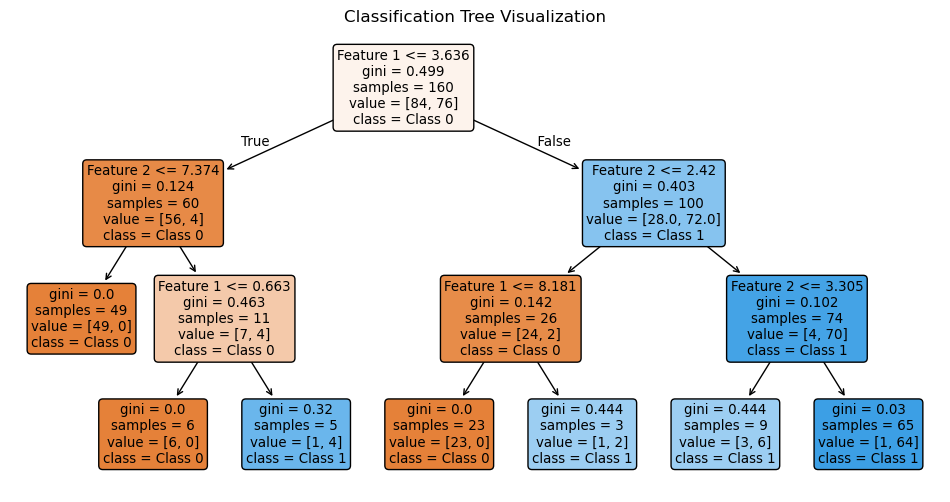

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# יצירת נתונים סינתטיים
np.random.seed(42)
X = np.random.rand(200, 2) * 10
Y = (X[:, 0] + X[:, 1] > 10).astype(int)  # מחלקה בינארית

# חלוקת הנתונים לסט אימון ובדיקה
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# בניית עץ סיווג
tree = DecisionTreeClassifier(max_depth=3)
tree.fit(X_train, Y_train)

# חיזוי תוצאות
Y_pred = tree.predict(X_test)

# הדפסת ביצועי המודל
print(f"Accuracy: {accuracy_score(Y_test, Y_pred):.4f}")
print("Confusion Matrix:\n", confusion_matrix(Y_test, Y_pred))
print("Classification Report:\n", classification_report(Y_test, Y_pred))

# ציור העץ
plt.figure(figsize=(12,6))
plot_tree(tree, filled=True, feature_names=["Feature 1", "Feature 2"], class_names=["Class 0", "Class 1"], rounded=True)
plt.title("Classification Tree Visualization")
plt.show()

#### **📌 י ב־$scikit-learn$**, כשאנו לא מציינים במפורש את הפרמטר `$criterion$` (למשל `$criterion='entropy'$`), עץ הסיווג **משתמש כברירת מחדל** במדד ה־$Gini$ על מנת לקבוע כיצד לפצל את הנתונים בכל צומת של העץ. י  

### **📌 י 1. קביעת הפיצול $(Split)$ בכל צומת י**  
י כאשר האלגוריתם בונה את העץ, הוא בודק את כל הפיצולים האפשריים (ערכי סף עבור התכונות): י  
- י בכל צומת הוא מחשב את ה־**$Gini$ Impurity** לפני הפיצול ואחריו. י  
- י הוא בוחר את הפיצול שיוצר את **הירידה הגדולה ביותר ב־$Gini$** (כלומר, שמגדיל את ה”הומוגניות” באזורים החדשים). י  

### **📌 י 2. מה מופיע בגרף י**  
י בכל צומת של העץ (בתרשים שנוצר על ידי `$plot_tree$`), תוכלו לראות בין היתר: י  
- **י `$gini$`**: רמת האי־הומוגניות של המדגם באותו צומת (ערך בין $0$ ל־$0.5$ בסיווג בינארי; $0$ מעיד על טוהר מוחלט). י  
- **י `$samples$`**: מספר הדגימות באותו צומת. י  
- **י `$value=[x, y]$`**: כמה דגימות משויכות לכל מחלקה בצומת (כאן יש שתי מחלקות $0$ ו־$1$, ולכן שני מספרים). י  
- **י `$class=...$`**: איזו מחלקה נקבעת כרוב בצומת (המחלקה שהעץ “יבחר” אם תצפית תגיע לצומת זה). י  

### **📌 י 3. כיצד לקרוא את ה־$Gini$ מהגרף י**  
- **י ערך גבוה** (קרוב ל־$0.5$ בסיווג בינארי) אומר שיש בצומת תערובת די שווה בין המחלקות (צומת “לא הומוגני”). י  
- **י ערך נמוך** (קרוב ל־$0$) מעיד שהצומת כמעט הומוגני במחלקה אחת. י  

### **📌 י 4. מדוע $Gini$? י**  
- י הוא מדד שנוח לחישוב ומהיר לאופטימיזציה (מבחינת קריטריון $CART$). י  
- י הוא רגיש לשינויים ביחסי המחלקות יותר ממדד טעות סיווג $(Misclassification Error)$, ולכן “מדרבן” פיצולים גם בשינויים קטנים. י  

---

## **📌 י לסיכום י**  
- י הגרף שאתה רואה נוצר לאחר שהעץ **בחר (באופן רקורסיבי)** את סדרת הפיצולים שמקטינה את ה־$Gini$ בכל שלב בצורה הטובה ביותר. י  
- י ה־$Gini$ המופיע בצמתים משקף **עד כמה נתוני האימון בצומת ההוא מעורבים (בין המחלקות)**, ומראה לך אילו צמתים “טהורים” יותר ואילו “מעורבבים” יותר. י  

---

# **📌 י $Cross-Validation$ לבחירת עומק אופטימלי של עץ סיווג י**  

## **📌 י מדוע חשוב לבחור עומק עץ אופטימלי? י**  
י עומק העץ משפיע על **היכולת של המודל ללמוד דפוסים מהנתונים**: י  

🔹 **י אם העץ רדוד מדי** → המודל **לא לומד היטב את הנתונים** $(Underfitting)$. י  
🔹 **י אם העץ עמוק מדי** → המודל **לומד את הרעש ולא את הדפוסים הכלליים** $(Overfitting)$. י  

📌 **י מטרה:** י  
י למצוא את **עומק העץ** שממזער **טעויות סיווג**, תוך איזון **דיוק ולמידה כללית**. י  

---

## **📌 י כיצד $Cross-Validation$ עוזר בבחירת עומק עץ? י**  
י $Cross-Validation$ היא שיטה להערכת ביצועי מודל ע"י **פיצול הנתונים למספר חלקים $(Folds)$**. י  

🔹 **י שלבים:** י  
1. י מחלקים את הנתונים ל־$k$ חלקים $(Folds)$. י  
2. י מאמנים את העץ על **$k-1$ חלקים** ובודקים ביצועים על החלק הנותר. י  
3. י חוזרים על התהליך עבור כל עומק עץ אפשרי. י  
4. י בוחרים את עומק העץ שמביא **לדיוק הגבוה ביותר** על פני כל ה־$Folds$. י  

📌 **י התוצאה:** י  
- י העומק עם **השגיאה הנמוכה ביותר** מסומן כאופטימלי. י  
- י מאפשר להימנע מ־$Overfitting$ ו־$Underfitting$. י  

---

## **📌 י אלגוריתם לבחירת עומק אופטימלי י**  
1. י נגדיר **טווח ערכים אפשריים** לעומק העץ (למשל, בין $1$ ל־$10$). י  
2. י עבור כל עומק נבצע **$Cross-Validation$ עם $k=5$ קפלים**: י  
   - י נמדוד **דיוק $(Accuracy)$** או **שגיאת סיווג $(Misclassification Error)$**. י  
3. י נבחר את **עומק העץ עם הדיוק הממוצע הגבוה ביותר**. י  

---

## **📌 י דוגמה לקוד $Cross-Validation$ לבחירת עומק אופטימלי י**  


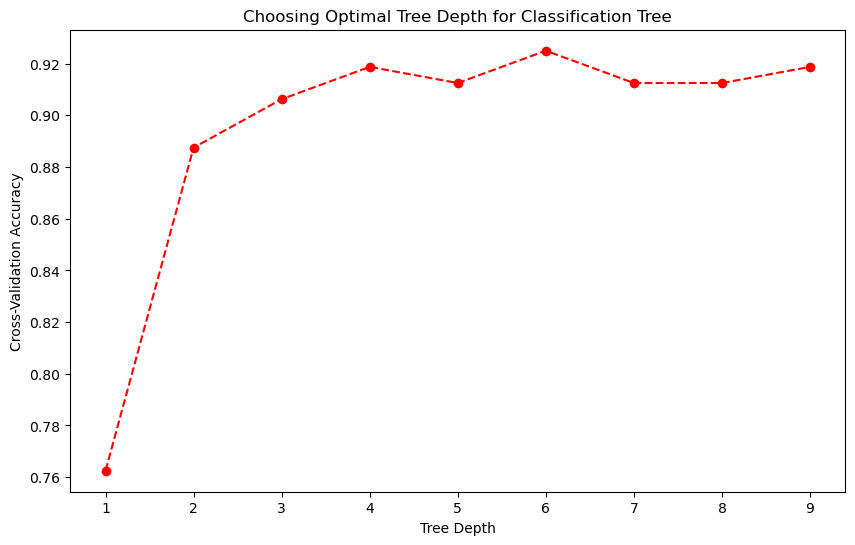

In [3]:
from sklearn.model_selection import cross_val_score

# בדיקת עומקי עץ שונים
depths = range(1, 10)
cv_scores = [cross_val_score(DecisionTreeClassifier(max_depth=d), X_train, Y_train, cv=5, scoring='accuracy').mean() for d in depths]

# גרף שגיאה מול עומק
plt.figure(figsize=(10,6))
plt.plot(depths, cv_scores, marker="o", linestyle="dashed", color="red")
plt.xlabel("Tree Depth")
plt.ylabel("Cross-Validation Accuracy")
plt.title("Choosing Optimal Tree Depth for Classification Tree")
plt.show()